In [1]:
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import h5py

from wombat.utils import listfiles

In [2]:
run_dir = '../analysis/mCRC/combined_run_1'

In [4]:
fp = os.path.join(run_dir, 'output.h5')
f = h5py.File(fp, 'r')

In [5]:
f.keys()

<KeysViewHDF5 ['hyperparameters', 'latent_states', 'parameters', 'progress']>

In [6]:
iteration = list(f['parameters']['M'].keys())[-1]
f['parameters']['M'][iteration]

<HDF5 dataset "90": shape (13040, 20), type "<f8">

In [7]:
f['hyperparameters']

<HDF5 group "/hyperparameters" (5 members)>

In [8]:
iteration

'90'

In [9]:
metagenes = np.asarray(f['parameters']['M'][iteration])
fov_to_emb = {}
for k in f['latent_states']['XT'].keys():
    fov_to_emb[k] = np.asarray(f['latent_states']['XT'][k][iteration])

In [12]:
gene_table = pd.read_csv(os.path.join(run_dir, 'inputs', 'files', 'genes_0.txt'),
                         sep='\t', header=None, index_col=0)
gene_table.index.name = 'gene'
metagene_df = pd.DataFrame(data=metagenes, index=gene_table.index,
                         columns=[f'metagene_{i}'for i in range(metagenes.shape[1])])
metagene_df

,metagene_0,metagene_1,metagene_2,metagene_3,metagene_4,metagene_5,metagene_6,metagene_7,metagene_8,metagene_9,metagene_10,metagene_11,metagene_12,metagene_13,metagene_14,metagene_15,metagene_16,metagene_17,metagene_18,metagene_19
gene,,,,,,,,,,,,,,,,,,,,
LINC01128,2.415578e-05,5.619129e-05,4.232987e-05,2.727021e-07,1.946708e-06,3.742393e-15,4.775144e-05,6.324193e-05,1.881494e-05,4.349938e-05,6.300533e-06,4.161838e-15,6.860852e-05,0.000035,1.177759e-05,3.842137e-07,1.990523e-05,1.690199e-06,0.000004,3.093997e-05
SAMD11,4.905070e-05,1.468336e-14,7.341045e-16,8.277952e-16,5.540713e-06,5.592821e-16,8.775678e-16,1.603958e-15,9.222597e-16,5.115471e-04,1.231374e-16,2.719260e-04,1.584101e-16,0.000084,3.433826e-04,1.975310e-16,1.904734e-05,6.977615e-16,0.000009,2.763119e-05
NOC2L,8.775448e-05,8.475026e-05,3.262102e-05,5.547675e-15,1.220602e-04,7.461120e-06,3.155563e-05,1.169488e-04,3.737246e-04,3.779436e-05,6.765075e-05,8.136094e-06,1.521079e-04,0.000076,4.418013e-05,2.395525e-04,5.323764e-05,9.238879e-05,0.000104,9.387289e-05
KLHL17,2.631914e-05,6.526706e-05,1.827751e-15,1.140474e-14,6.412534e-05,1.665328e-15,5.229918e-16,1.868297e-05,9.057465e-05,5.683646e-05,1.081381e-15,7.102396e-15,7.533605e-05,0.000075,1.688362e-15,2.313318e-05,2.203444e-05,3.508394e-05,0.000015,3.745438e-05
HES4,1.977238e-04,1.136812e-04,1.285472e-05,5.127342e-06,1.215289e-04,6.479105e-16,5.591810e-06,1.976332e-15,5.397311e-04,9.543895e-04,4.524178e-05,1.453241e-04,8.569860e-05,0.000045,3.245900e-04,3.192529e-04,3.753188e-13,1.193157e-04,0.000021,5.295519e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-CYB,6.099722e-05,1.662155e-05,5.632728e-04,2.433072e-03,3.072600e-04,2.097459e-15,1.746881e-03,4.604119e-04,5.546339e-04,9.994699e-05,5.827375e-04,1.561046e-04,2.995809e-05,0.000274,3.306050e-15,6.558000e-04,3.217023e-03,4.343065e-04,0.000657,4.015054e-04
AC011043.1,1.257697e-04,9.998938e-16,1.525331e-05,1.025199e-14,2.906437e-05,1.357412e-15,9.537957e-16,1.275199e-15,8.403241e-16,9.288797e-16,2.833985e-06,7.579953e-14,3.377839e-05,0.000046,3.761249e-15,1.833544e-16,1.906623e-14,6.576691e-06,0.000025,4.118036e-06
AL592183.1,4.011371e-06,4.430736e-05,2.022200e-15,3.468659e-15,2.572635e-16,5.630691e-15,1.258028e-05,1.353788e-15,1.298807e-15,2.438739e-15,3.058450e-06,2.578613e-05,4.737551e-06,0.000031,1.781520e-12,6.106235e-16,2.145069e-15,8.100797e-16,0.000022,9.556312e-06


In [14]:
fps = sorted(listfiles(os.path.join(run_dir, 'inputs', 'input_adatas')))
fps

['../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_225C1_U2.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_225C1_U3.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_225C1_U4.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_225C1_U5.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_liver_HT225C1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/CRC_liver_HT230C1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/HT213C1A4U1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/HT250C1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/HT253C1T1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/HT260C1Th1K1U1.h5ad',
 '../analysis/mCRC/combined_run_1/inputs/input_adatas/HT291C1U1.h5ad']

In [15]:
sample_to_adata = {fp.split('/')[-1].split('.')[0]:sc.read_h5ad(fp)
                   for fp in fps}
sample_to_adata.keys()

dict_keys(['CRC_225C1_U2', 'CRC_225C1_U3', 'CRC_225C1_U4', 'CRC_225C1_U5', 'CRC_liver_HT225C1', 'CRC_liver_HT230C1', 'HT213C1A4U1', 'HT250C1', 'HT253C1T1', 'HT260C1Th1K1U1', 'HT291C1U1'])

In [16]:
directory = os.path.join(run_dir, 'result_adatas')
Path(directory).mkdir(parents=True, exist_ok=True)
for s, a in sample_to_adata.items():
    fov = str(a.obs['fov'][0])
    a.obsm['metagene_emb'] = fov_to_emb[fov]
    a.uns['metagene_df'] = metagene_df
    
    a.write_h5ad(os.path.join(directory, f'{s}.h5ad'))
    

In [17]:
a = next(iter(sample_to_adata.values()))
a

AnnData object with n_obs × n_vars = 3681 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'sample_id', 'fov', 'highlight'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'highlight_colors', 'spatial', 'spot_to_neighbors', 'metagene_df'
    obsm: 'spatial', 'metagene_emb'

In [18]:
for i in range(a.obsm['metagene_emb'].shape[1]):
    a.obs[f'metagene_{i}'] = a.obsm['metagene_emb'][:, i]

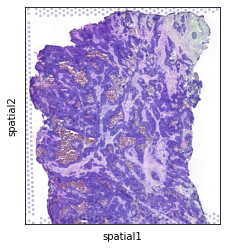

In [19]:
sc.pl.spatial(a)

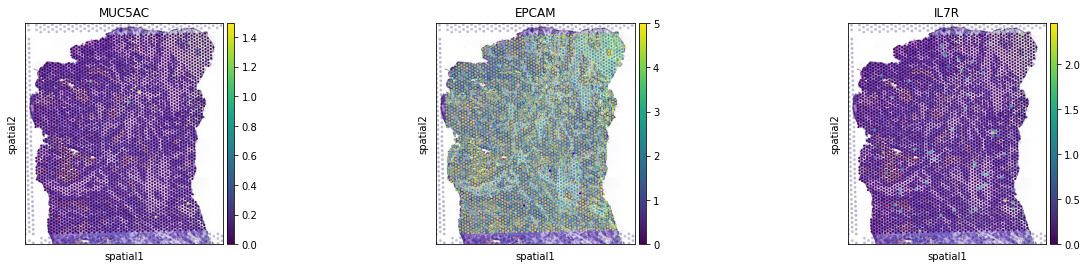

In [28]:
sc.pl.spatial(a, color=['MUC5AC', 'EPCAM', 'IL7R'])

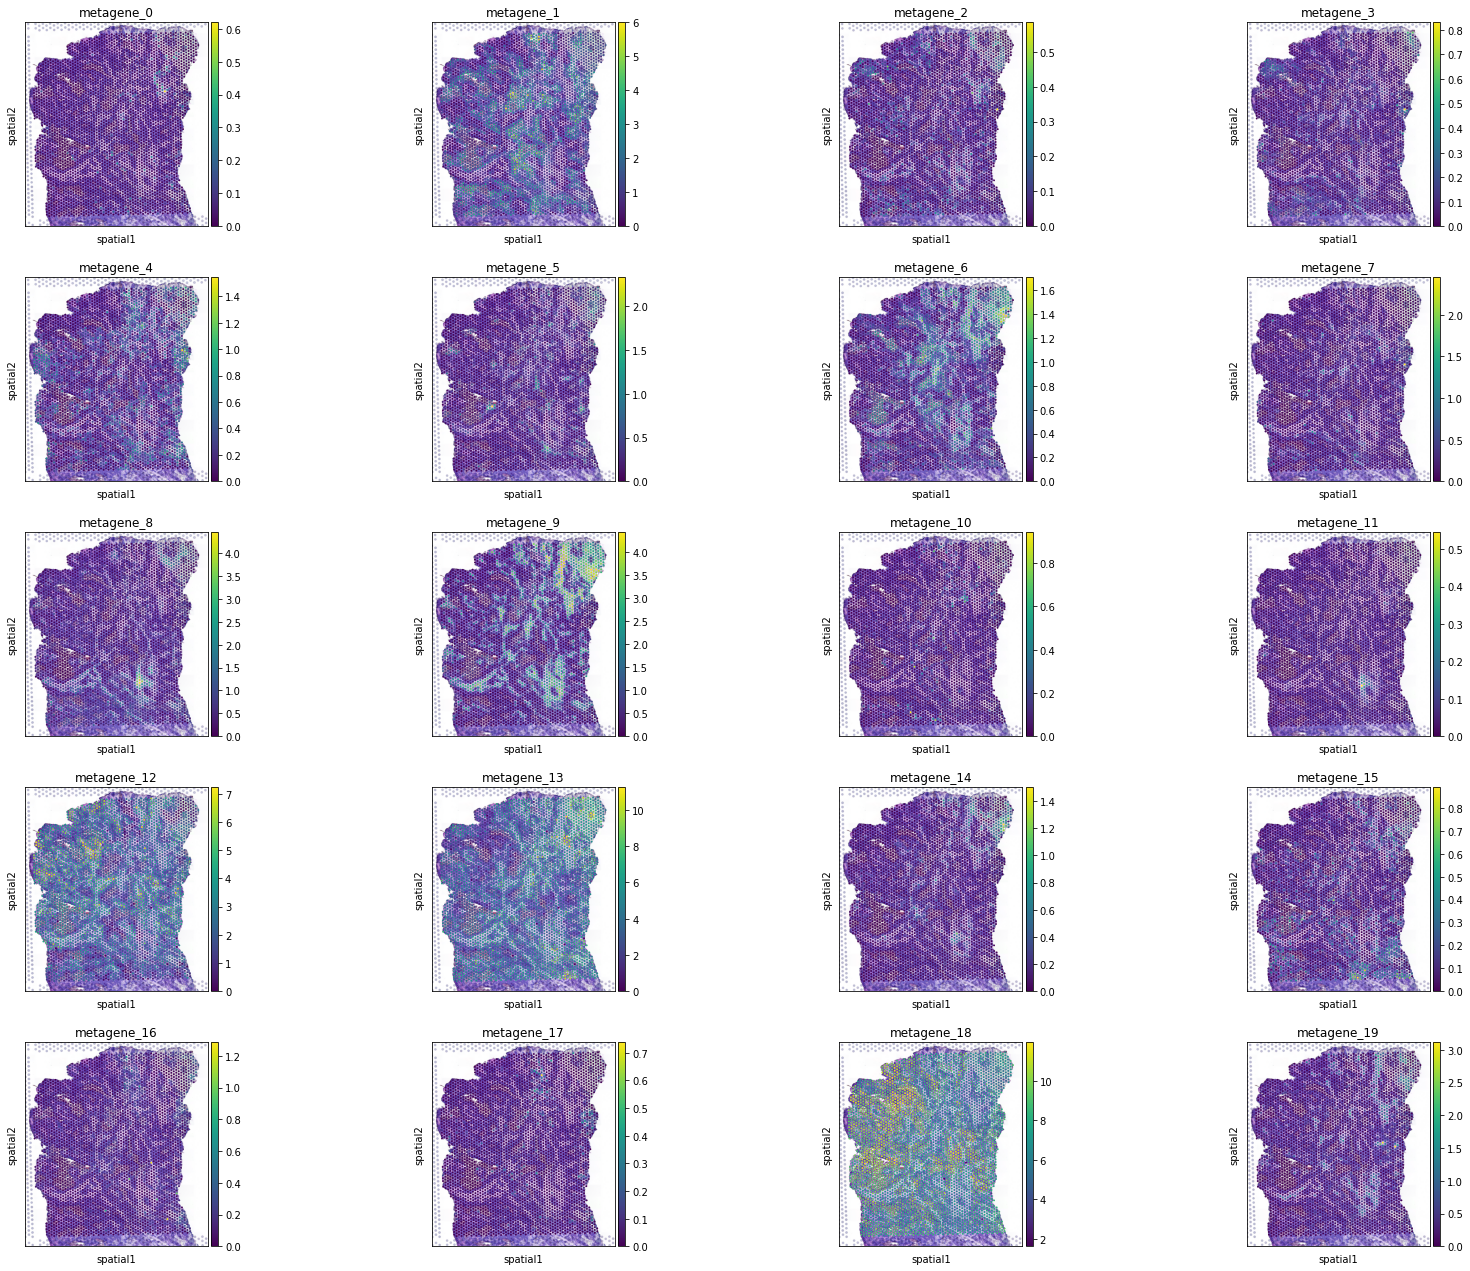

In [21]:
sc.pl.spatial(a, color=[c for c in a.obs.columns if 'metagene' in c])

In [34]:
metagene_df.sort_values('metagene_9', ascending=False).index[:100]

Index(['COL1A1', 'FBLN2', 'ACTA2', 'COL1A2', 'ELN', 'THBS2', 'COL3A1', 'FSTL1',
       'COL5A1', 'MGP', 'SPARC', 'TAGLN', 'COL6A2', 'COL4A1', 'IGFBP7',
       'EFEMP1', 'FBN1', 'COL6A1', 'THY1', 'ADAMTS2', 'DCN', 'COL5A2',
       'COL4A2', 'COL6A3', 'AEBP1', 'VCAN', 'LUM', 'LRRC32', 'CFH', 'HTRA1',
       'TIMP1', 'C1R', 'EMILIN1', 'COLEC11', 'PDGFRB', 'PDLIM3', 'BGN',
       'CCDC80', 'COL14A1', 'CCN2', 'LOXL2', 'ENG', 'PTGIS', 'C11orf96',
       'FBLN5', 'TIMP3', 'ASPN', 'COL18A1', 'VIM', 'NOTCH3', 'MYL9', 'PXDN',
       'CXCL12', 'IGFBP4', 'TIMP2', 'C1S', 'GNG11', 'TUBA1A', 'GGT5',
       'SERPINE2', 'MEGF6', 'CAVIN1', 'PALLD', 'TPM2', 'F2R', 'PCOLCE',
       'PRELP', 'CCDC3', 'LTBP2', 'EFEMP2', 'NGFR', 'FN1', 'COL16A1',
       'COL15A1', 'MRC2', 'LGALS1', 'CLEC11A', 'CALD1', 'SYNPO', 'FMOD',
       'SFRP4', 'ANTXR1', 'AQP1', 'LTBP4', 'PKDCC', 'HES4', 'CYGB', 'MEG3',
       'ECM1', 'UNC5B', 'GSN', 'ADGRA2', 'UACA', 'FSTL3', 'PLAC9', 'HSPG2',
       'C7', 'CSRP1', 'MASP1', 'EGFL7'],


In [31]:
metagene_df.sort_values('metagene_8', ascending=False).index[:100]

Index(['S100A6', 'RPLP1', 'RPL8', 'FTL', 'RPS15', 'RPL13', 'MIF', 'SERF2',
       'RPS2', 'RPL18A', 'RPL10', 'TMSB10', 'RPL18', 'KRT8', 'RPL28', 'FAU',
       'RPL35', 'RPS19', 'RPL36', 'RPS3', 'APOE', 'ISG15', 'RPS21', 'TIMP1',
       'RPS28', 'RPS9', 'KRT18', 'GAPDH', 'PHGR1', 'ELOB', 'RPL41', 'RPS14',
       'MZT2B', 'RPLP2', 'PRDX5', 'KRT19', 'RPS18', 'RPS10', 'TAGLN', 'IFI27',
       'FTH1', 'COX5B', 'CLDN4', 'RPS27', 'IFITM3', 'RPS5', 'COL1A1', 'GSTP1',
       'EIF6', 'APRT', 'CTSD', 'RPL29', 'MYL6', 'RPLP0', 'RPS11', 'RPL13A',
       'MYL9', 'EEF1D', 'RPL7A', 'COX8A', 'NDUFB7', 'CLDN3', 'RPSA', 'UQCR11',
       'LY6E', 'BGN', 'PPP1R14B', 'C9orf16', 'NDUFA13', 'CST3', 'RPL15',
       'LGALS1', 'TYMP', 'S100A11', 'OAZ1', 'PFN1', 'FLNA', 'HSPB1', 'MICOS13',
       'HLA-A', 'CLIC1', 'CYBA', 'SELENOW', 'COL1A2', 'LAMTOR4', 'SCAND1',
       'ADIRF', 'MT-CO2', 'EEF1G', 'CFL1', 'GADD45GIP1', 'GUK1', 'RPL3',
       'RHOC', 'NME2', 'CCDC85B', 'RPS16', 'FIS1', 'TSPO', 'GNB2'],
      dtype=

In [ ]:
metagene_df.sort_values('metagene_8', ascending=False).index[:100]

In [32]:
metagene_df.sort_values('metagene_11', ascending=False).index[:100]

Index(['IGLC2', 'IGLC3', 'IGKC', 'IGHG1', 'IGLC1', 'IGHA1', 'IGHG4', 'IGHG3',
       'IGHG2', 'IGHA2', 'JCHAIN', 'IGHM', 'C7', 'MZB1', 'C3', 'SSR4', 'DCN',
       'FBLN1', 'PTGDS', 'MGP', 'DERL3', 'FOS', 'RNASE1', 'GPX3', 'FOSB',
       'SERPINF1', 'XBP1', 'EGR1', 'GAS6', 'MFAP4', 'DEPP1', 'C1R', 'CCN1',
       'FKBP11', 'CFH', 'HERPUD1', 'TXNDC5', 'AEBP1', 'C11orf96', 'TSC22D3',
       'JUNB', 'COLEC11', 'ZFP36', 'TNXB', 'TPSB2', 'MT2A', 'IGFBP4',
       'SELENOP', 'MMP2', 'NR4A1', 'CEBPD', 'SERPING1', 'CCDC80', 'LUM',
       'COL6A2', 'HLA-DPB1', 'COL14A1', 'GSN', 'RGS1', 'CYBA', 'DUSP1',
       'PRDX4', 'CRISPLD2', 'HLA-DQA2', 'CCL19', 'BGN', 'INMT', 'C1QB',
       'RRBP1', 'RARRES2', 'SDC1', 'CD74', 'VIM', 'ITM2C', 'C1QTNF1', 'H1FX',
       'IGFBP7', 'ADAMTS1', 'PLTP', 'BTG2', 'SPARCL1', 'GGT5', 'HLA-C',
       'PCOLCE', 'JUN', 'FOLR2', 'C12orf57', 'RABAC1', 'C1S', 'KLF2', 'LRP1',
       'FXYD6', 'CD14', 'PER1', 'CST3', 'HLA-DRA', 'CCL21', 'MT1X', 'TIMP1',
       'PLD3'],
      dty

In [33]:
metagene_df.sort_values('metagene_5', ascending=False).index[:100]

Index(['TYROBP', 'HLA-DRA', 'SPP1', 'LAPTM5', 'C1QB', 'FCER1G', 'GPNMB',
       'FCGR3A', 'RGS1', 'HLA-DPA1', 'ITGB2', 'C1QC', 'HLA-DPB1', 'IFI30',
       'SRGN', 'APOC1', 'CD68', 'HLA-DRB1', 'C1QA', 'LYZ', 'APOE', 'HLA-DQB1',
       'CTSB', 'HLA-DQA1', 'CD74', 'AIF1', 'FCGR2A', 'CD14', 'S100A9', 'CTSS',
       'CTSL', 'CD163', 'MS4A6A', 'GLUL', 'HLA-DMB', 'LIPA', 'LGMN', 'CTSD',
       'MSR1', 'HLA-DMA', 'FN1', 'CAPG', 'CTSC', 'ALOX5AP', 'MAFB', 'SLCO2B1',
       'ASAH1', 'CSF1R', 'ACP5', 'GM2A', 'RNASE1', 'LSP1', 'SPI1', 'CD53',
       'LST1', 'VIM', 'POSTN', 'LCP1', 'MS4A7', 'CTSZ', 'LILRB4', 'NUPR1',
       'NPC2', 'CXCL16', 'C3AR1', 'PSAP', 'SLC15A3', 'CFD', 'CXCR4', 'FCGR2B',
       'SGK1', 'LAIR1', 'SOD2', 'CYBB', 'MGP', 'CSTB', 'PLAUR', 'TNFSF13',
       'MT2A', 'FTL', 'AKR1B1', 'SDCBP', 'MMP11', 'PLD3', 'VSIG4', 'VCAN',
       'TREM2', 'ATP6V1B2', 'CTHRC1', 'GRN', 'C5AR1', 'CD44', 'SERPINA1',
       'TYMP', 'ITGAX', 'TGFBI', 'SAT1', 'COL6A3', 'IGSF6', 'ARHGDIB'],
      dtype='

In [35]:
metagene_df.sort_values('metagene_12', ascending=False).index[:100]

Index(['MAGOH', 'TPT1', 'RTRAF', 'LAMTOR2', 'SLBP', 'EMC6', 'COX16', 'PFDN6',
       'MEA1', 'SRM', 'TRAPPC1', 'PSMD9', 'FTH1', 'SMC4', 'CDK2AP2', 'MRPL23',
       'ISCU', 'GGCT', 'THOC7', 'RPL41', 'PYURF', 'SIVA1', 'CENPW', 'RPLP1',
       'NDUFB6', 'ZNHIT3', 'CIAO2A', 'NDUFA5', 'SNHG15', 'ZBTB8OS', 'TFDP1',
       'SNHG12', 'EEF1E1', 'DTYMK', 'POLR2G', 'SNRPD1', 'LSM3', 'ENSA', 'BAX',
       'EIF3L', 'NCBP2AS2', 'PRDX3', 'SKA2', 'EEF1A1', 'MRPL18', 'OCIAD1',
       'SMIM7', 'AHSA1', 'ESD', 'SFT2D1', 'LSM8', 'SMDT1', 'MRPS18C', 'LSM1',
       'SNHG3', 'MRPL16', 'RPS12', 'RPS19BP1', 'MRPL34', 'MRPL32', 'CDK1',
       'ISOC2', 'SDHD', 'CISD3', 'GCSH', 'TMEM14C', 'GLRX5', 'FTL', 'ARPC5L',
       'IER3IP1', 'WRNIP1', 'PTPMT1', 'HMGB3', 'IMP3', 'STMP1', 'SRP19',
       'HES6', 'COX14', 'HMGB2', 'PSENEN', 'COA6', 'PSMB10', 'GTF2A2',
       'C1orf122', 'BRIX1', 'POLR2E', 'NDUFAF4', 'CAMTA1', 'NDUFB5', 'PTRH2',
       'HMGN3', 'RPL13', 'RPL28', 'PHF5A', 'MED10', 'TIMM23', 'PSMB5', 'MRPS2',
  